##Applied Data Science

##Assignment - 3

##Name:A.Guna

##Registration Number: 20BCB7014

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing (4).csv


In [ ]:
data=pd.read_csv("Housing.csv")

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

##Univariate Analysis

<Axes: ylabel='Frequency'>

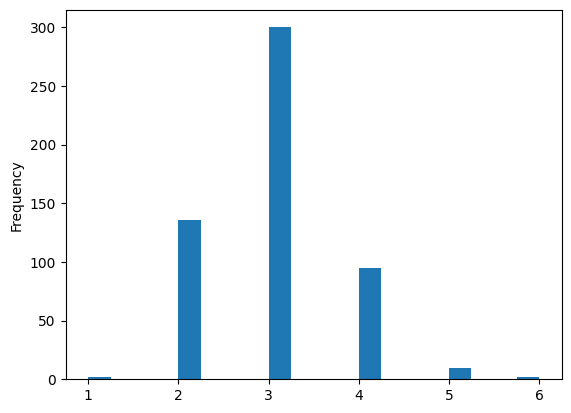

In [ ]:
data['bedrooms'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

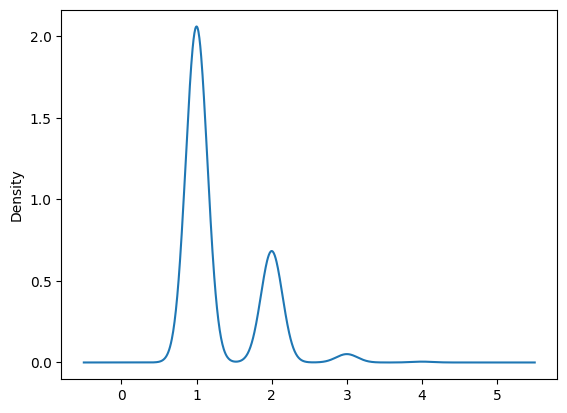

In [ ]:
data['bathrooms'].plot(kind='kde')

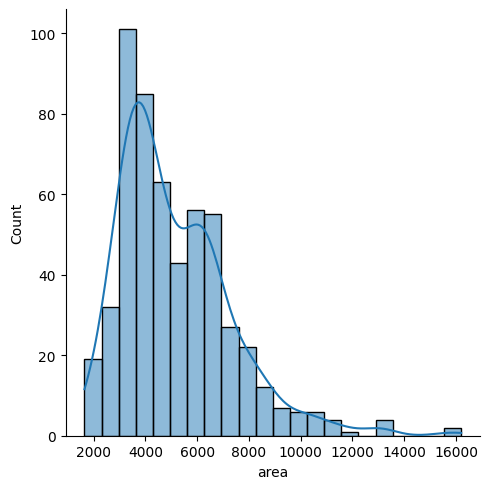

In [ ]:
sns.displot(data=data, x = "area",kde=True)

<Axes: >

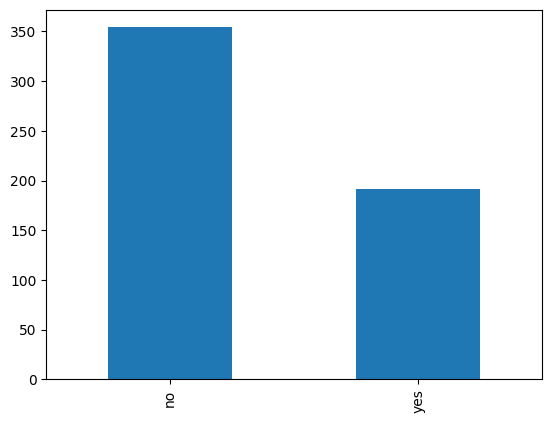

In [ ]:
data['basement'].value_counts().plot(kind='bar')

<Axes: ylabel='furnishingstatus'>

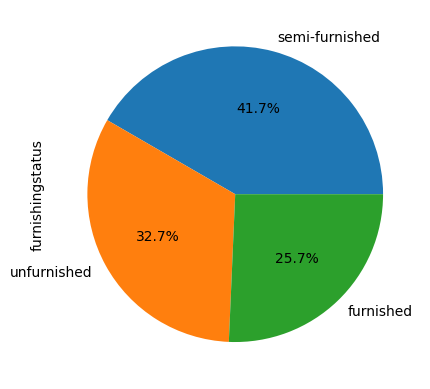

In [ ]:
data['furnishingstatus'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='area'>

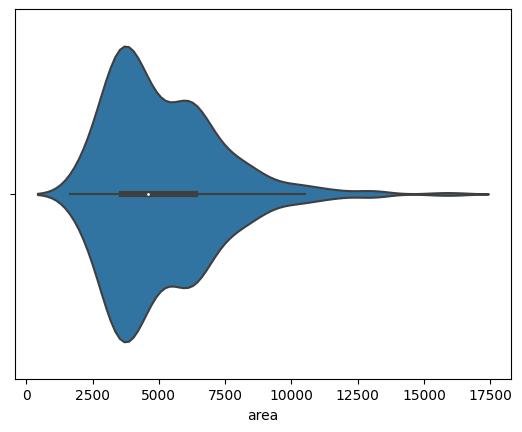

In [ ]:
sns.violinplot(x=data["area"])

<Axes: xlabel='price'>

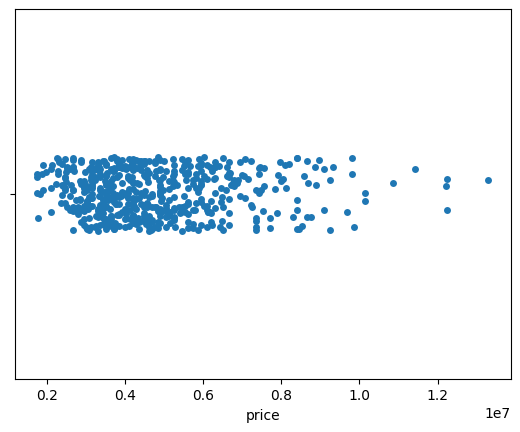

In [ ]:
sns.stripplot(x=data["price"])

<Axes: xlabel='area'>

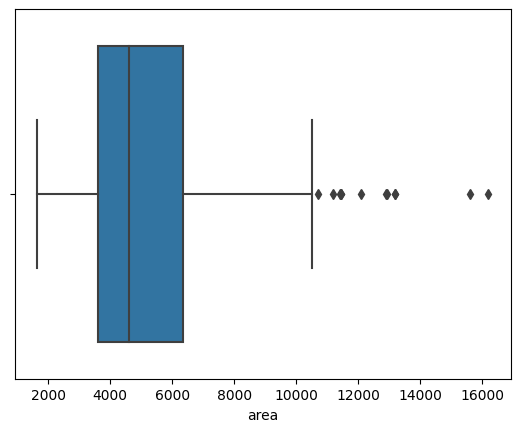

In [ ]:
sns.boxplot(x = data["area"])

##Bivariate Analysis

<Axes: xlabel='stories', ylabel='bathrooms'>

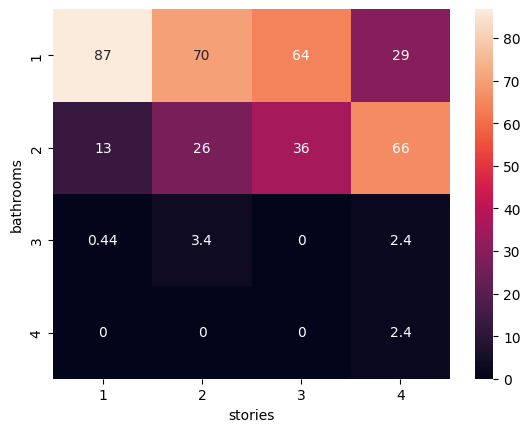

In [ ]:
sns.heatmap(pd.crosstab(data['bathrooms'],data['stories'],normalize='columns')*100, annot=True)

<Axes: xlabel='bedrooms'>

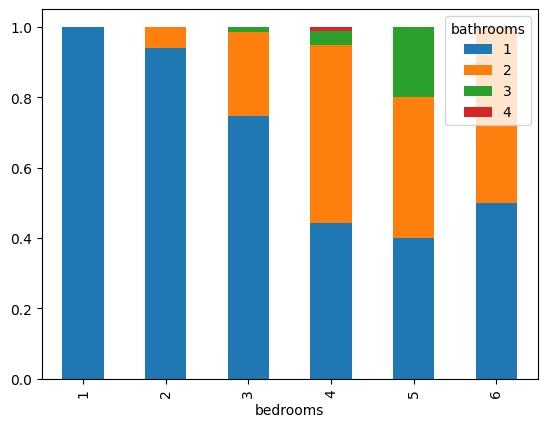

In [ ]:
pd.crosstab(data['bedrooms'],data['bathrooms'],normalize='index').plot(kind='bar',stacked=True)

<Axes: xlabel='bathrooms', ylabel='bedrooms'>

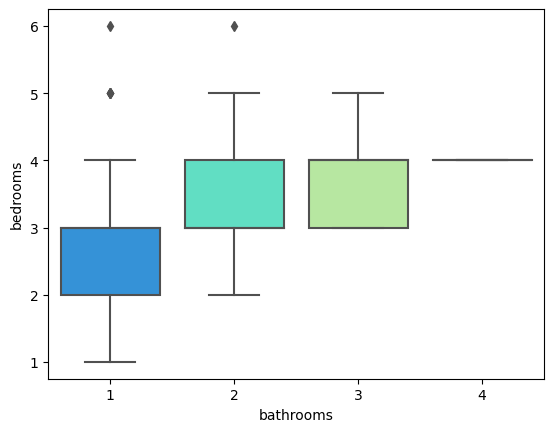

In [ ]:
sns.boxplot(x='bathrooms',y='bedrooms',data=data,palette='rainbow')

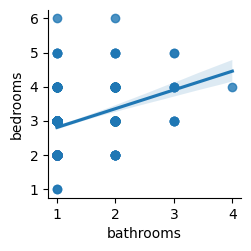

In [ ]:
sns.pairplot(data = data, x_vars = 'bathrooms', y_vars = 'bedrooms', kind='reg')

<Axes: xlabel='bedrooms', ylabel='area'>

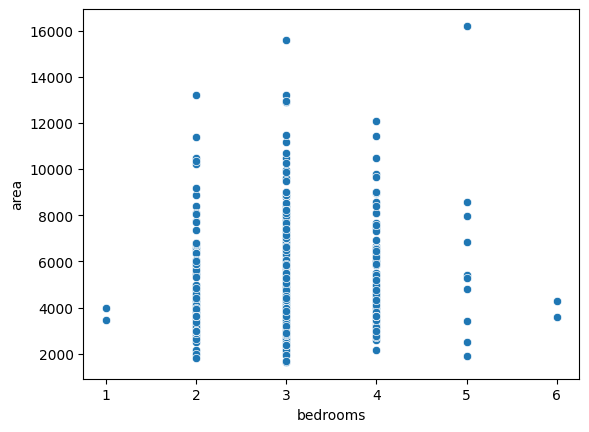

In [ ]:
sns.scatterplot(data = data, x = 'bedrooms', y = 'area')

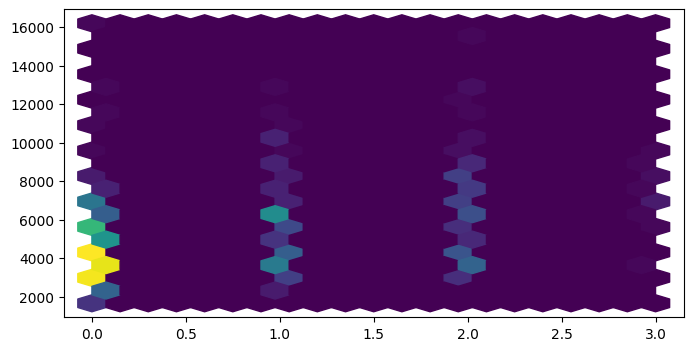

In [ ]:
x = data['parking']
y = data['area']
fig=plt.figure(figsize = (8,4))
plt.hexbin(x,y,gridsize=20)
plt.show()

##Multivariate Analysis

In [ ]:
!pip install plotly
import plotly.express as px
px.scatter_3d(data, x = 'area', y = 'price', z = 'bedrooms', color = 'guestroom', width = 620, height = 600)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


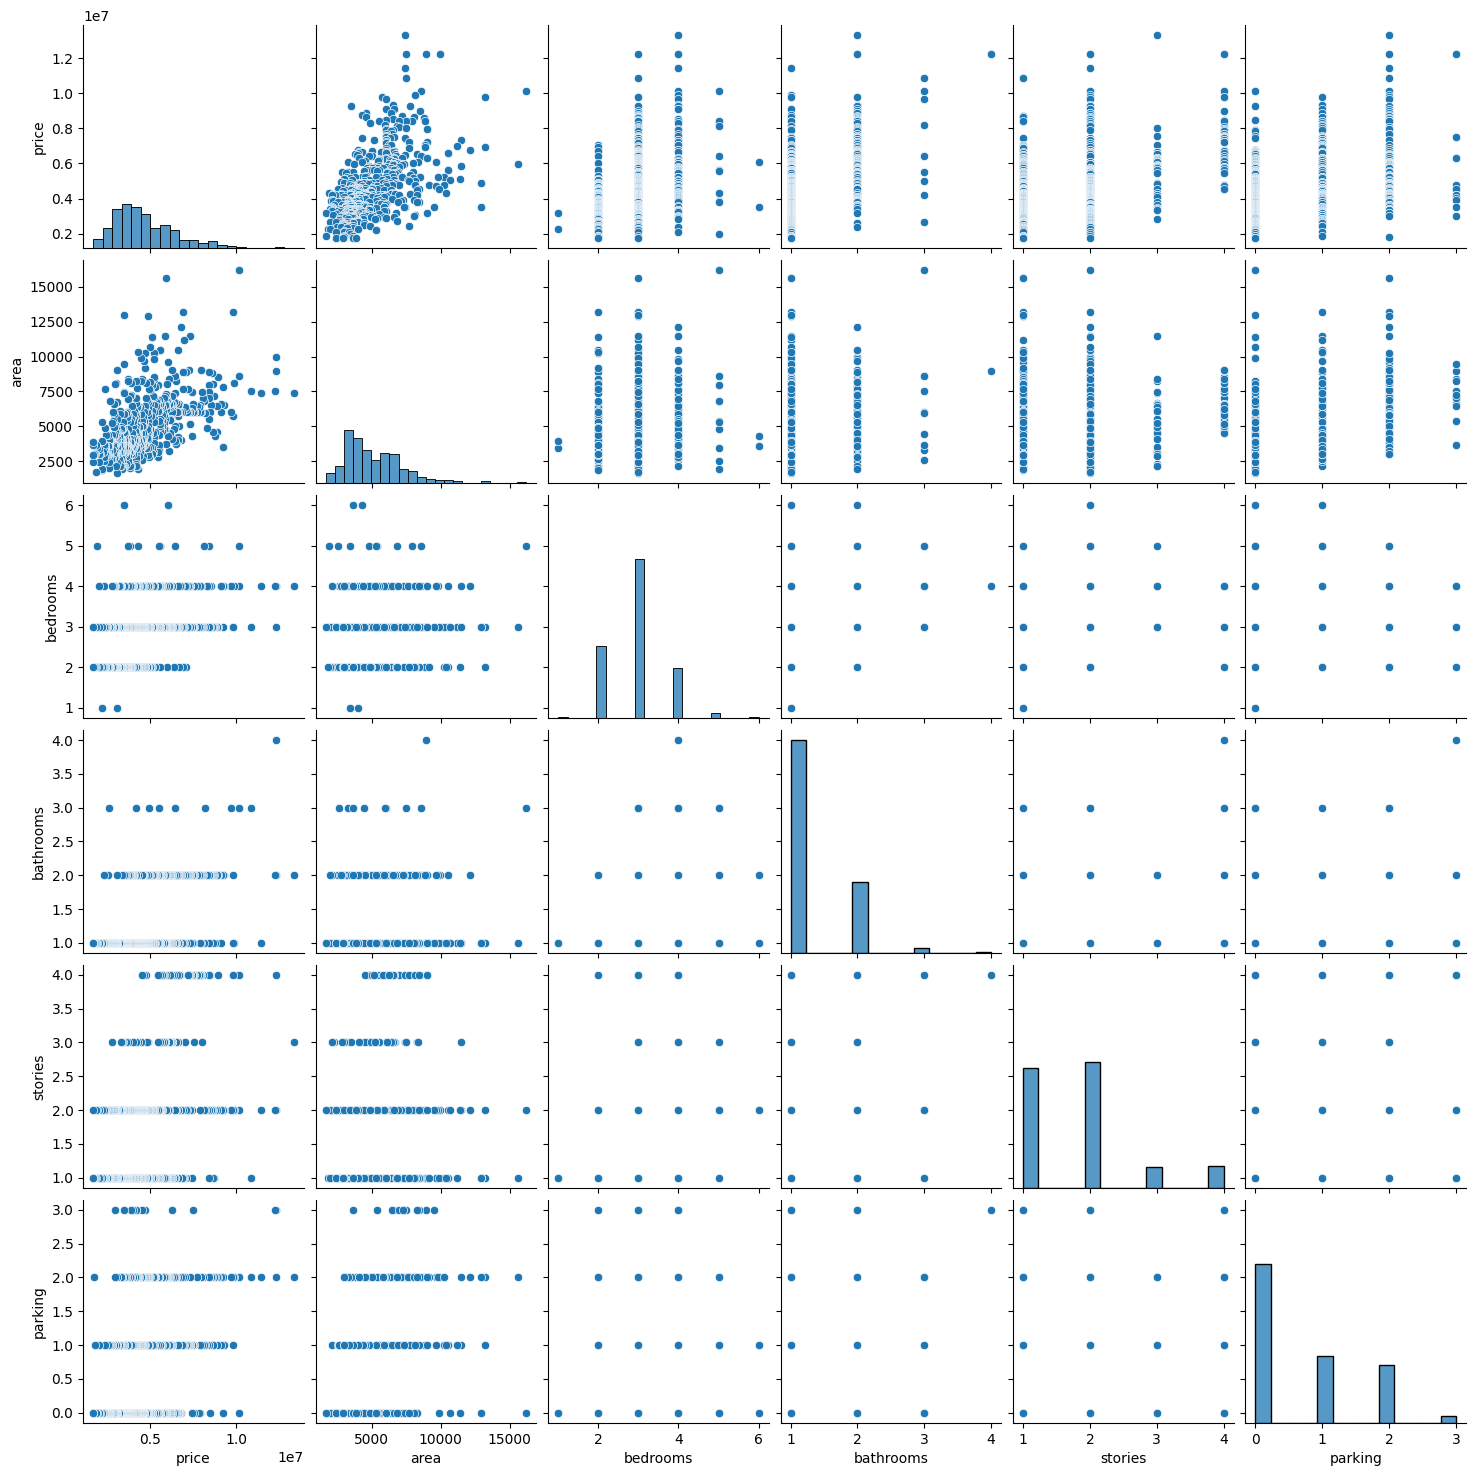

In [ ]:
sns.pairplot(data)

<Axes: >

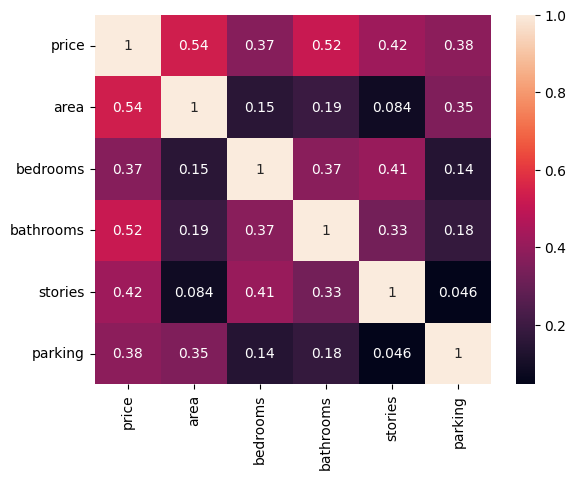

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

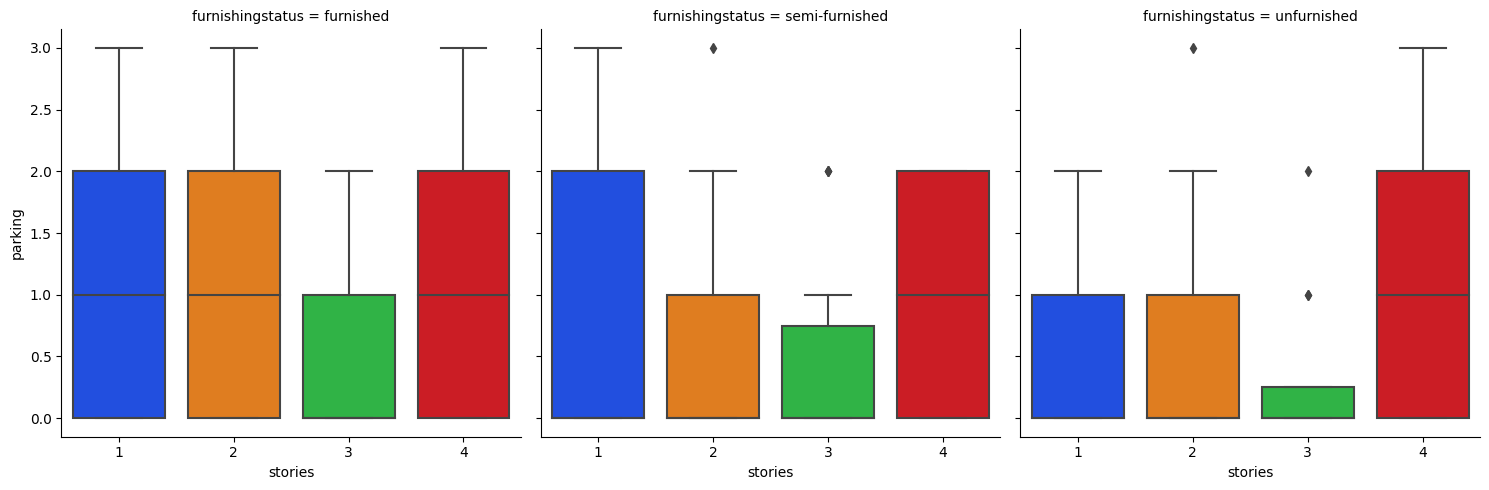

In [ ]:
sns.catplot(
    x='stories',
    y='parking',
    data=data,
    palette='bright',
    kind = 'box',
    col='furnishingstatus');

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

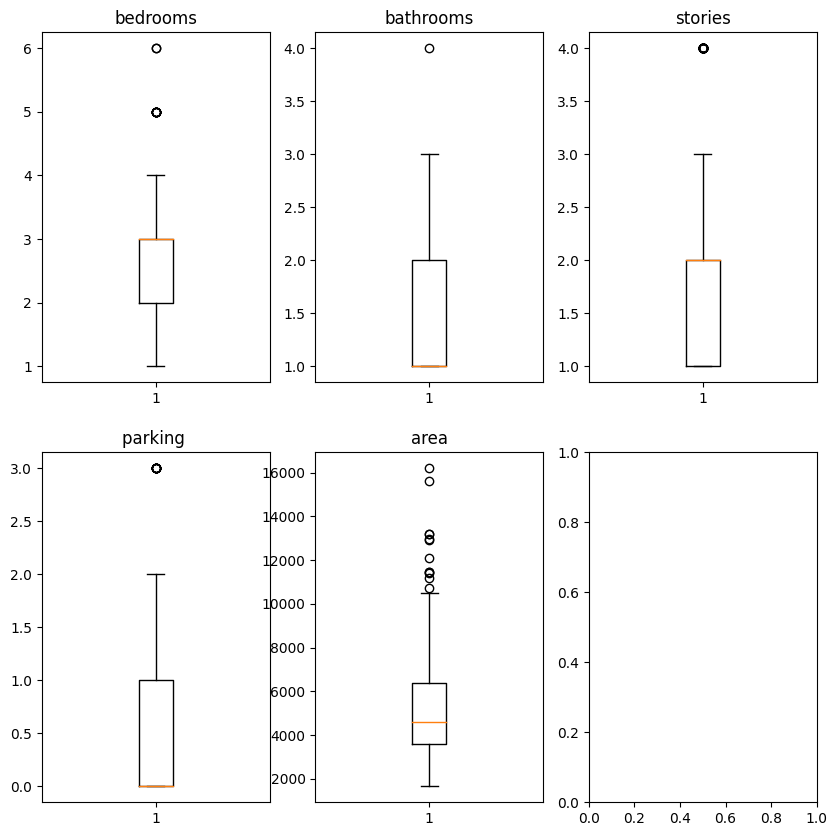

In [ ]:
figure,axis =  plt.subplots(2, 3, figsize=(10, 10))

axis[0,0].boxplot(x = data['bedrooms'])
axis[0,0].set_title('bedrooms')
axis[0,1].boxplot(x = data['bathrooms'])
axis[0,1].set_title('bathrooms')
axis[0,2].boxplot(x = data['stories'])
axis[0,2].set_title('stories')
axis[1,0].boxplot(x = data['parking'])
axis[1,0].set_title('parking ')
axis[1,1].boxplot(x = data['area'])
axis[1,1].set_title('area')

plt.show()

In [ ]:
Q1 = data['bedrooms'].quantile(0.25)
Q3 = data['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['bedrooms']=np.where(data['bedrooms']>upper_whisker,upper_whisker,np.where(data['bedrooms']<lower_whisker,lower_whisker,data['bedrooms']))

In [ ]:
Q1 = data['bathrooms'].quantile(0.25)
Q3 = data['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['bathrooms']=np.where(data['bathrooms']>upper_whisker,upper_whisker,np.where(data['bathrooms']<lower_whisker,lower_whisker,data['bathrooms']))

In [ ]:
Q1 = data['stories'].quantile(0.25)
Q3 = data['stories'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['stories']=np.where(data['stories']>upper_whisker,upper_whisker,np.where(data['stories']<lower_whisker,lower_whisker,data['stories']))

In [ ]:
Q1 = data['parking'].quantile(0.25)
Q3 = data['parking'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['parking']=np.where(data['parking']>upper_whisker,upper_whisker,np.where(data['parking']<lower_whisker,lower_whisker,data['parking']))

In [ ]:
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['area']=np.where(data['area']>upper_whisker,upper_whisker,np.where(data['area']<lower_whisker,lower_whisker,data['area']))

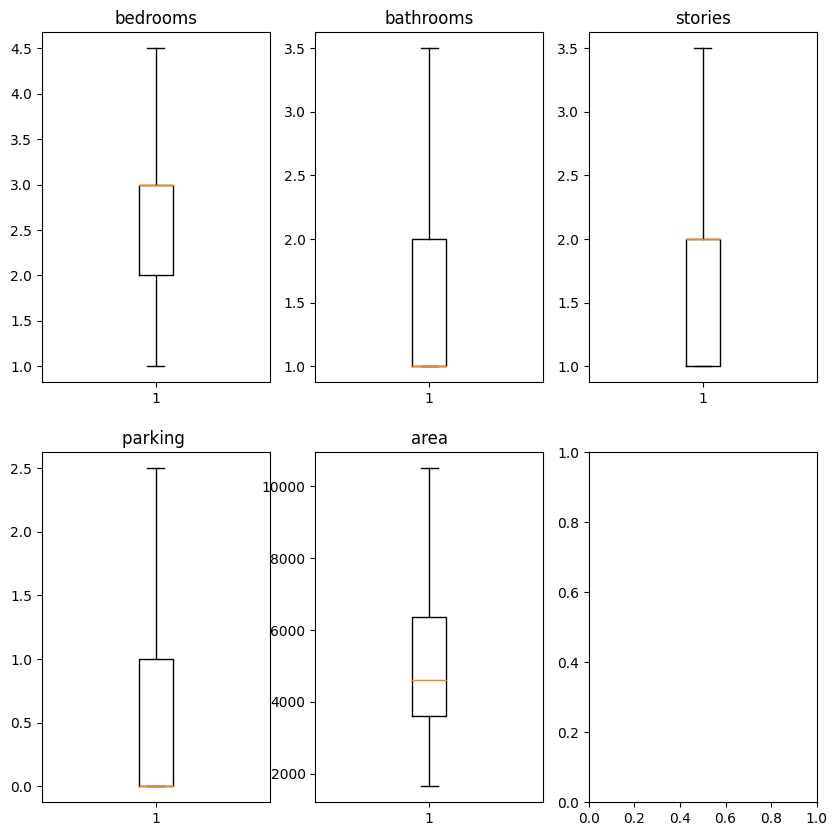

In [ ]:
figure,axis =  plt.subplots(2, 3, figsize=(10, 10))

axis[0,0].boxplot(x = data['bedrooms'])
axis[0,0].set_title('bedrooms')
axis[0,1].boxplot(x = data['bathrooms'])
axis[0,1].set_title('bathrooms')
axis[0,2].boxplot(x = data['stories'])
axis[0,2].set_title('stories')
axis[1,0].boxplot(x = data['parking'])
axis[1,0].set_title('parking ')
axis[1,1].boxplot(x = data['area'])
axis[1,1].set_title('area')

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe = OneHotEncoder()
le = LabelEncoder()

In [ ]:
cat_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

def binary_mapping(x):
  return x.map({'yes': 1, "no": 0})

data[cat_columns] = data[cat_columns].apply(binary_mapping)

In [ ]:
table = pd.get_dummies(data['furnishingstatus'])
table.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
data = pd.concat([data, table], axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,furnished,1,0,0
1,12250000,8960.0,4.0,3.5,3.5,1,0,0,0,1,2.5,furnished,1,0,0
2,12250000,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,semi-furnished,0,1,0
3,12215000,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.5,furnished,1,0,0
4,11410000,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,furnished,1,0,0


In [ ]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,semi-furnished,unfurnished
0,13300000,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0,0
1,12250000,8960.0,4.0,3.5,3.5,1,0,0,0,1,2.5,1,0,0
2,12250000,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,0,1,0
3,12215000,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.5,1,0,0
4,11410000,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    float64
 2   bedrooms         545 non-null    float64
 3   bathrooms        545 non-null    float64
 4   stories          545 non-null    float64
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    float64
 11  furnished        545 non-null    uint8  
 12  semi-furnished   545 non-null    uint8  
 13  unfurnished      545 non-null    uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 48.6 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_new = data.copy(deep=True)
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

data_new[num_columns] = MinMaxScaler().fit_transform(data_new[num_columns])

data_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,semi-furnished,unfurnished
0,13300000,0.651977,0.857143,0.4,0.8,1,0,0,0,1,0.8,1,0,0
1,12250000,0.825989,0.857143,1.0,1.0,1,0,0,0,1,1.0,1,0,0
2,12250000,0.938983,0.571429,0.4,0.4,1,0,1,0,0,0.8,0,1,0
3,12215000,0.661017,0.857143,0.4,0.4,1,0,1,0,1,1.0,1,0,0
4,11410000,0.651977,0.857143,0.0,0.4,1,1,1,0,1,0.8,1,0,0


In [ ]:
y = data_new.pop('price')
x = data_new

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([2556456.34685157,  318654.14991562, 2783698.54193916,
        998337.6380151 ,  480610.77646318,  283627.76547229,
        476227.88693959,  645909.61619927,  765683.38822782,
        636633.49092441,  214820.99354877,    7997.85328686,
       -222818.84683562])

In [ ]:
model.intercept_

1909442.3584506502

In [ ]:
y_pred = model.predict(x_test)

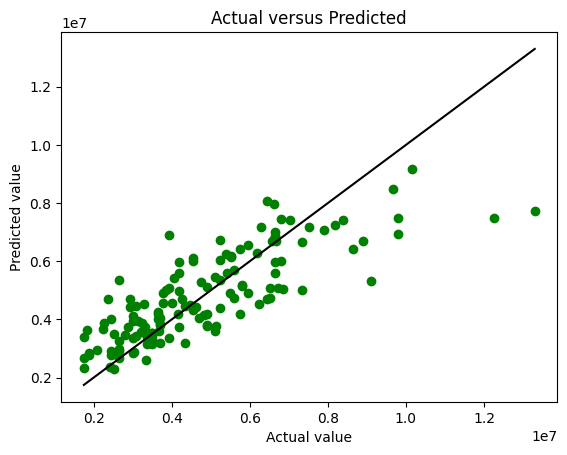

In [ ]:
plt.scatter(y_test,y_pred, c='green')
x=y
plt.plot(x,y,c='k')
plt.title('Actual versus Predicted')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

In [ ]:
per_error = 100*(y_pred-y_test)/y_test

df_prd_tst = pd.DataFrame({'Predicted Price':y_pred.astype('int64'), 'Actual Price':y_test, '% Error':per_error})
df_prd_tst

,Predicted Price,Actual Price,% Error
316,5431128,4060000,33.771630
77,6865790,6650000,3.244977
360,3179482,3710000,-14.299658
90,4712855,6440000,-26.819011
493,3454240,2800000,23.365738
...,...,...,...
172,6733342,5250000,28.254150
124,6561650,5950000,10.279834
388,3326387,3500000,-4.960352
521,2351064,2408000,-2.364418


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred, squared = False)

1274254.2631350812

In [ ]:
r2_score(y_test, y_pred)

0.6476482572325669

In [ ]:
acc=r2_score(y_test,y_pred)
acc

0.6476482572325669